### ***Initializing and Importing Packages***

In [1]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, JLD, ProgressMeter, Dates

DataDir = "../../Data/"
FigsDir = "../../Figs/"

include("Mods.jl")

theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm
    fontfamily="Computer Modern", frame=:box, label=nothing)

### ***Get and import data***

In [6]:
# API_Key = "ADDB1242-D8BF-4A28-AC47-EC88A728259D"
# API_Key = "9AE8E65E-79A6-415F-A1E0-4D167655CAEB"
API_Key = "D0E92A88-20CE-4539-902F-19F09AE2A8A8"
StatsMods.GetData("BTC"; Period="5MIN", StartDate=DateTime(2022, 01, 31), EndDate = DateTime(2022, 02, 4), api_key=API_Key)
StatsMods.GetData("ETH"; Period="5MIN", StartDate=DateTime(2022, 01, 31), EndDate = DateTime(2022, 02, 4), api_key=API_Key)
StatsMods.GetData("XRP"; Period="5MIN", StartDate=DateTime(2022, 01, 31), EndDate = DateTime(2022, 02, 4), api_key=API_Key)
StatsMods.GetData("SOL"; Period="5MIN", StartDate=DateTime(2022, 01, 31), EndDate = DateTime(2022, 02, 4), api_key=API_Key)
StatsMods.GetData("ADA"; Period="5MIN", StartDate=DateTime(2022, 01, 31), EndDate = DateTime(2022, 02, 4), api_key=API_Key)

220375

In [4]:
DataBTC = StatsMods.LoadData("BTC"; Period="5MIN");
DataETH = StatsMods.LoadData("ETH"; Period="5MIN");
DataXRP = StatsMods.LoadData("XRP"; Period="5MIN");
DataSOL = StatsMods.LoadData("SOL"; Period="5MIN");
DataADA = StatsMods.LoadData("ADA"; Period="5MIN");

### ***Results***

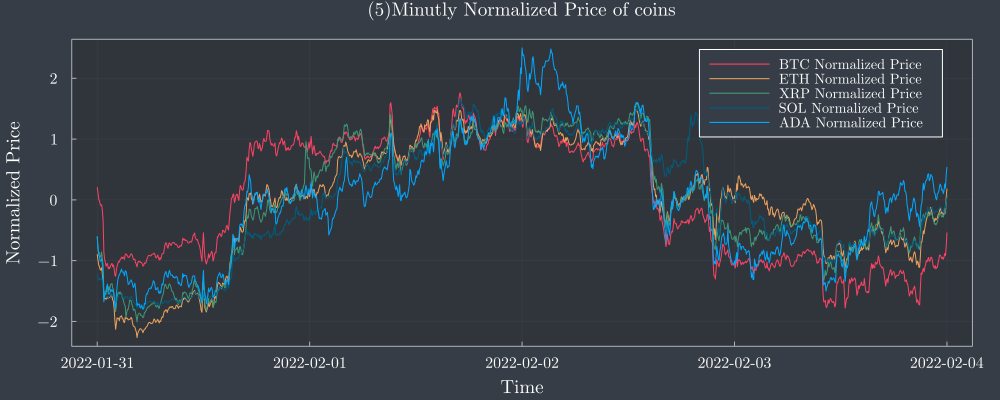

In [24]:
plot(DataBTC[4], DataBTC[3], label ="BTC Normalized Price")
plot!(DataETH[4], DataETH[3], label="ETH Normalized Price")
plot!(DataXRP[4], DataXRP[3], label="XRP Normalized Price")
plot!(DataSOL[4], DataSOL[3], label="SOL Normalized Price")
plot!(DataADA[4], DataADA[3], label="ADA Normalized Price")
plot!(title = "(5)Minutly Normalized Price of coins", xlab = "Time", ylab = "Normalized Price", size = (1000, 400))

In [6]:
CalculateDelayedCor(MainCoin::Vector{Float64}, DependentCoin::Vector{Float64}, τ::Int; Δt=30) = cor(MainCoin[end-Δt:end], DependentCoin[end-Δt-τ:end-τ]);
CalculateDelayedCov(MainCoin::Vector{Float64}, DependentCoin::Vector{Float64}, τ::Int; Δt=30) = cov(MainCoin[end-Δt:end], DependentCoin[end-Δt-τ:end-τ]);

In [7]:
LMT = 30
ND = length(DataBTC[3])
BTCMEANDATA = [mean(DataBTC[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ETHMEANDATA = [mean(DataETH[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
XRPMEANDATA = [mean(DataXRP[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
SOLMEANDATA = [mean(DataSOL[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];
ADAMEANDATA = [mean(DataADA[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1];

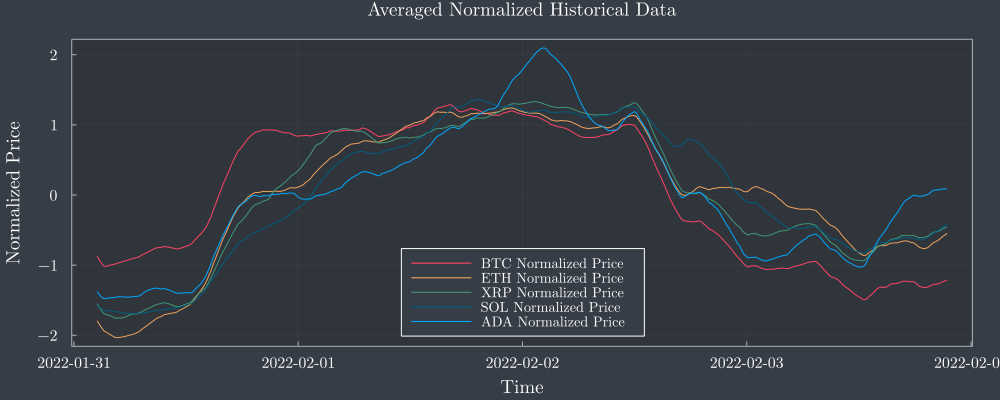

In [26]:
plot(DataBTC[4][LMT+1:ND-LMT-1], BTCMEANDATA, label="BTC Normalized Price")
plot!(DataETH[4][LMT+1:ND-LMT-1], ETHMEANDATA, label="ETH Normalized Price")
plot!(DataXRP[4][LMT+1:ND-LMT-1], XRPMEANDATA, label="XRP Normalized Price")
plot!(DataSOL[4][LMT+1:ND-LMT-1], SOLMEANDATA, label="SOL Normalized Price")
plot!(DataADA[4][LMT+1:ND-LMT-1], ADAMEANDATA, label="ADA Normalized Price")
plot!(title="Averaged Normalized Historical Data", xlab="Time", ylab="Normalized Price", size=(1000, 400), legend = 240)

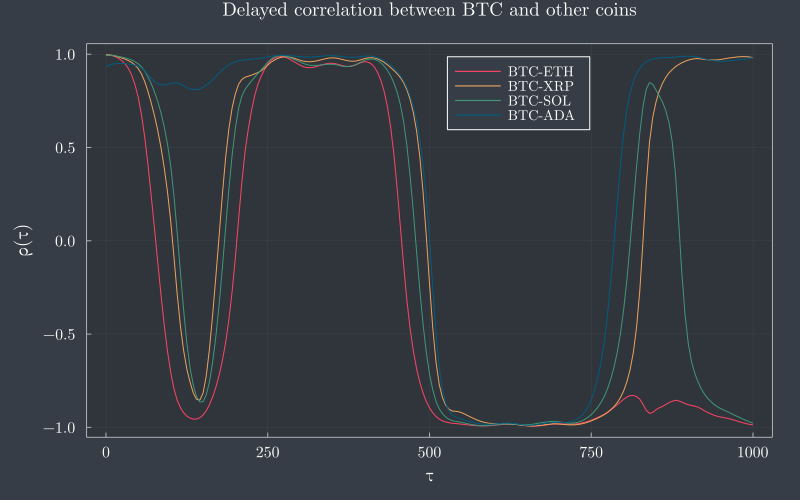

In [27]:
EndTime = 200
MinSpan = 0:5:5*EndTime
plot(MinSpan, [CalculateDelayedCor(BTCMEANDATA, ETHMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-ETH")
plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, XRPMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-XRP")
plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, SOLMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-SOL")
plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, ADAMEANDATA, τ) for τ ∈ 0:EndTime], label = "BTC-ADA")
plot!(title="Delayed correlation between BTC and other coins", ylab = "ρ(τ)", xlab = "τ", size = (800, 500), legend = 65)

┌ Info: Saved animation to 
│   fn = c:\Users\shahm\Documents\GitHub\Crypto-Correlation-Analysis\Figs\S4-DC-Anim.gif
└ @ Plots C:\Users\shahm\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\shahm\\Documents\\GitHub\\Crypto-Correlation-Analysis\\Figs\\S4-DC-Anim.gif")
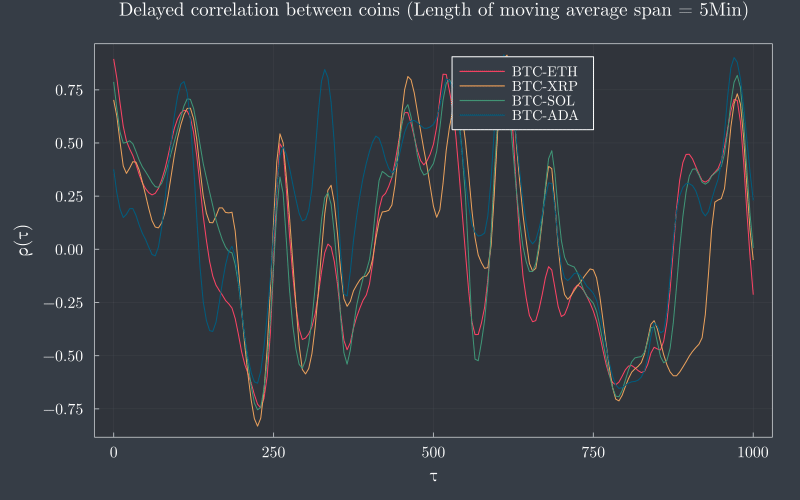

In [38]:
EndTime = 200
MinSpan = 0:5:5*EndTime
ND = length(DataBTC[3])
Anim = Animation()

for LMT ∈ 1:100
    BTCMEANDATA = [mean(DataBTC[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    ETHMEANDATA = [mean(DataETH[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    XRPMEANDATA = [mean(DataXRP[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    SOLMEANDATA = [mean(DataSOL[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]
    ADAMEANDATA = [mean(DataADA[3][t-LMT:t+LMT]) for t ∈ LMT+1:ND-LMT-1]

    PLT = begin
        plot(MinSpan, [CalculateDelayedCor(BTCMEANDATA, ETHMEANDATA, τ) for τ ∈ 0:EndTime], label="BTC-ETH")
        plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, XRPMEANDATA, τ) for τ ∈ 0:EndTime], label="BTC-XRP")
        plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, SOLMEANDATA, τ) for τ ∈ 0:EndTime], label="BTC-SOL")
        plot!(MinSpan, [CalculateDelayedCor(BTCMEANDATA, ADAMEANDATA, τ) for τ ∈ 0:EndTime], label="BTC-ADA")
        plot!(title="Delayed correlation between coins (Length of moving average span = $(5*LMT)Min)",
            ylab="ρ(τ)", xlab="τ", size=(800, 500), legend=65)
    end
    frame(Anim, PLT)
end

gif(Anim, FigsDir * "S4-DC-Anim.gif")